***Python script that calculates Cohen Kappa for literature review agreement data. ***

The code includes:

Key Features:

Manual calculation with step-by-step computation showing Po and Pe

Verification using scikit-learn to confirm the results

Landis & Koch interpretation of the kappa value

Additional statistics including overall agreement rate and positive agreement

Proper data formatting from confusion matrix


**The script will output:**

Confusion matrix in a readable format

Step-by-step kappa calculation (Po, Pe, κ)

Interpretation using Landis & Koch scale

Verification with sklearn

Additional agreement statistics



In [ ]:
import numpy as np
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import pandas as pd

def calculate_cohens_kappa_manual(confusion_matrix):
    """
    Calculate Cohen's Kappa manually from a confusion matrix
    """
    # Extract values from confusion matrix
    # Format: [[TP, FP], [FN, TN]] where rows=Saad, cols=Emilia
    a, b = confusion_matrix[0]  # Saad Yes: agrees=a, disagrees=b
    c, d = confusion_matrix[1]  # Saad No: disagrees=c, agrees=d

    total = a + b + c + d

    # Step 1: Calculate observed agreement (Po)
    observed_agreement = (a + d) / total

    # Step 2: Calculate expected agreement by chance (Pe)
    # Marginal probabilities
    p_saad_yes = (a + b) / total
    p_saad_no = (c + d) / total
    p_emilia_yes = (a + c) / total
    p_emilia_no = (b + d) / total

    # Expected agreement
    expected_agreement = (p_saad_yes * p_emilia_yes) + (p_saad_no * p_emilia_no)

    # Step 3: Calculate Cohen's Kappa
    if expected_agreement == 1:
        kappa = 0  # Avoid division by zero
    else:
        kappa = (observed_agreement - expected_agreement) / (1 - expected_agreement)

    return {
        'kappa': kappa,
        'observed_agreement': observed_agreement,
        'expected_agreement': expected_agreement,
        'interpretation': interpret_kappa(kappa)
    }

def interpret_kappa(kappa):
    """
    Interpret Cohen's Kappa using Landis & Koch (1977) scale
    """
    if kappa < 0:
        return "No agreement (worse than chance)"
    elif kappa <= 0.20:
        return "Slight agreement"
    elif kappa <= 0.40:
        return "Fair agreement"
    elif kappa <= 0.60:
        return "Moderate agreement"
    elif kappa <= 0.80:
        return "Substantial agreement"
    else:
        return "Almost perfect agreement"

# Your data
# Confusion matrix: rows=Saad, columns=Emilia
# [[Both_Yes, Saad_Yes_Emilia_No], [Saad_No_Emilia_Yes, Both_No]]
confusion_mat = np.array([[1, 3],
                         [4, 110]])

print("=== Cohen's Kappa Calculation for Literature Review Agreement ===\n")

print("Confusion Matrix (Saad vs Emilia):")
print("Rows: Saad's decisions, Columns: Emilia's decisions")
df_confusion = pd.DataFrame(confusion_mat,
                           columns=['Emilia: Yes', 'Emilia: No'],
                           index=['Saad: Yes', 'Saad: No'])
print(df_confusion)
print()

# Manual calculation
result = calculate_cohens_kappa_manual(confusion_mat)

print("=== Manual Calculation Results ===")
print(f"Observed Agreement (Po): {result['observed_agreement']:.6f}")
print(f"Expected Agreement (Pe): {result['expected_agreement']:.6f}")
print(f"Cohen's Kappa: {result['kappa']:.6f}")
print(f"Interpretation: {result['interpretation']}")
print()

# Using sklearn for verification
# Convert confusion matrix to individual ratings
saad_ratings = []
emilia_ratings = []

# Both said Yes (1 papers)
saad_ratings.extend([1] * 1)
emilia_ratings.extend([1] * 1)

# Saad Yes, Emilia No (3 papers)
saad_ratings.extend([1] * 3)
emilia_ratings.extend([0] * 3)

# Saad No, Emilia Yes (4 paper)
saad_ratings.extend([0] * 4)
emilia_ratings.extend([1] * 4)

# Both said No (110 papers)
saad_ratings.extend([0] * 110)
emilia_ratings.extend([0] * 110)

# Calculate using sklearn
sklearn_kappa = cohen_kappa_score(saad_ratings, emilia_ratings)

print("=== Verification using scikit-learn ===")
print(f"Cohen's Kappa (sklearn): {sklearn_kappa:.6f}")
print(f"Interpretation: {interpret_kappa(sklearn_kappa)}")
print()

# Additional statistics
total_papers = 118
agreements = 1 + 110  # Both yes + both no
disagreements = 3 + 4  # Saad yes/Emilia no + Saad no/Emilia yes

print("=== Additional Agreement Statistics ===")
print(f"Total papers reviewed: {total_papers}")
print(f"Total agreements: {agreements}")
print(f"Total disagreements: {disagreements}")
print(f"Overall agreement rate: {agreements/total_papers:.4f} ({agreements/total_papers*100:.2f}%)")
print(f"Positive agreement (on selected papers): {1}/{1+3+4} = {1/8:.4f} ({1/8*100:.1f}%)")

# Landis & Koch reference
print("\n=== Reference ===")
print("Interpretation scale from:")
print("Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement")
print("for categorical data. Biometrics, 33(1), 159-174.")

=== Cohen's Kappa Calculation for Literature Review Agreement ===

Confusion Matrix (Saad vs Emilia):
Rows: Saad's decisions, Columns: Emilia's decisions
           Emilia: Yes  Emilia: No
Saad: Yes            1           3
Saad: No             4         110

=== Manual Calculation Results ===
Observed Agreement (Po): 0.940678
Expected Agreement (Pe): 0.926602
Cohen's Kappa: 0.191781
Interpretation: Slight agreement

=== Verification using scikit-learn ===
Cohen's Kappa (sklearn): 0.191781
Interpretation: Slight agreement

=== Additional Agreement Statistics ===
Total papers reviewed: 118
Total agreements: 111
Total disagreements: 7
Overall agreement rate: 0.9407 (94.07%)
Positive agreement (on selected papers): 1/8 = 0.1250 (12.5%)

=== Reference ===
Interpretation scale from:
Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement
for categorical data. Biometrics, 33(1), 159-174.


***Python script for quality assessment agreement analysis.***

Here's what it does:

**Key Features**

**📊 Agreement Statistics:**

Fleiss' Kappa (for 3+ raters)

Intraclass Correlation Coefficient (ICC)

Weighted Cohen's Kappa (pairwise)

Perfect agreement rates


**📈 Analysis Capabilities:**

Overall agreement across all assessments

Pairwise evaluator comparisons

Score distribution analysis

Disagreement pattern identification

Visualization generation


**🔧 Flexible Input:**

Can read Excel files directly

Handles custom data formats

Works with your 0, 0.5, 1.0 scoring scale

In [ ]:
!pip install pandas numpy scipy scikit-learn seaborn matplotlib openpyxl

✅ Successfully loaded data: (45, 5)

📊 Data Preview:
                                               Paper  \
0  Exploring the application of artificial intell...   
1  Exploring the application of artificial intell...   
2  Exploring the application of artificial intell...   
3  Exploring the application of artificial intell...   
4  Exploring the application of artificial intell...   

                                           Criterion  Evaluator 1  \
0  Did the authors adequately justify the need fo...          1.0   
1  Did the authors establish a protocol prior to ...          0.0   
2  Did authors report their inclusion and exclusi...          0.0   
3  Did the authors use a comprehensive literature...          0.0   
4  Did the authors use a reliable study selection...          0.0   

   Evaluator 2  Evaluator 3  
0          0.5          1.0  
1          0.5          0.5  
2          0.5          0.5  
3          0.5          0.5  
4          0.0          0.0  

Columns: ['Pap

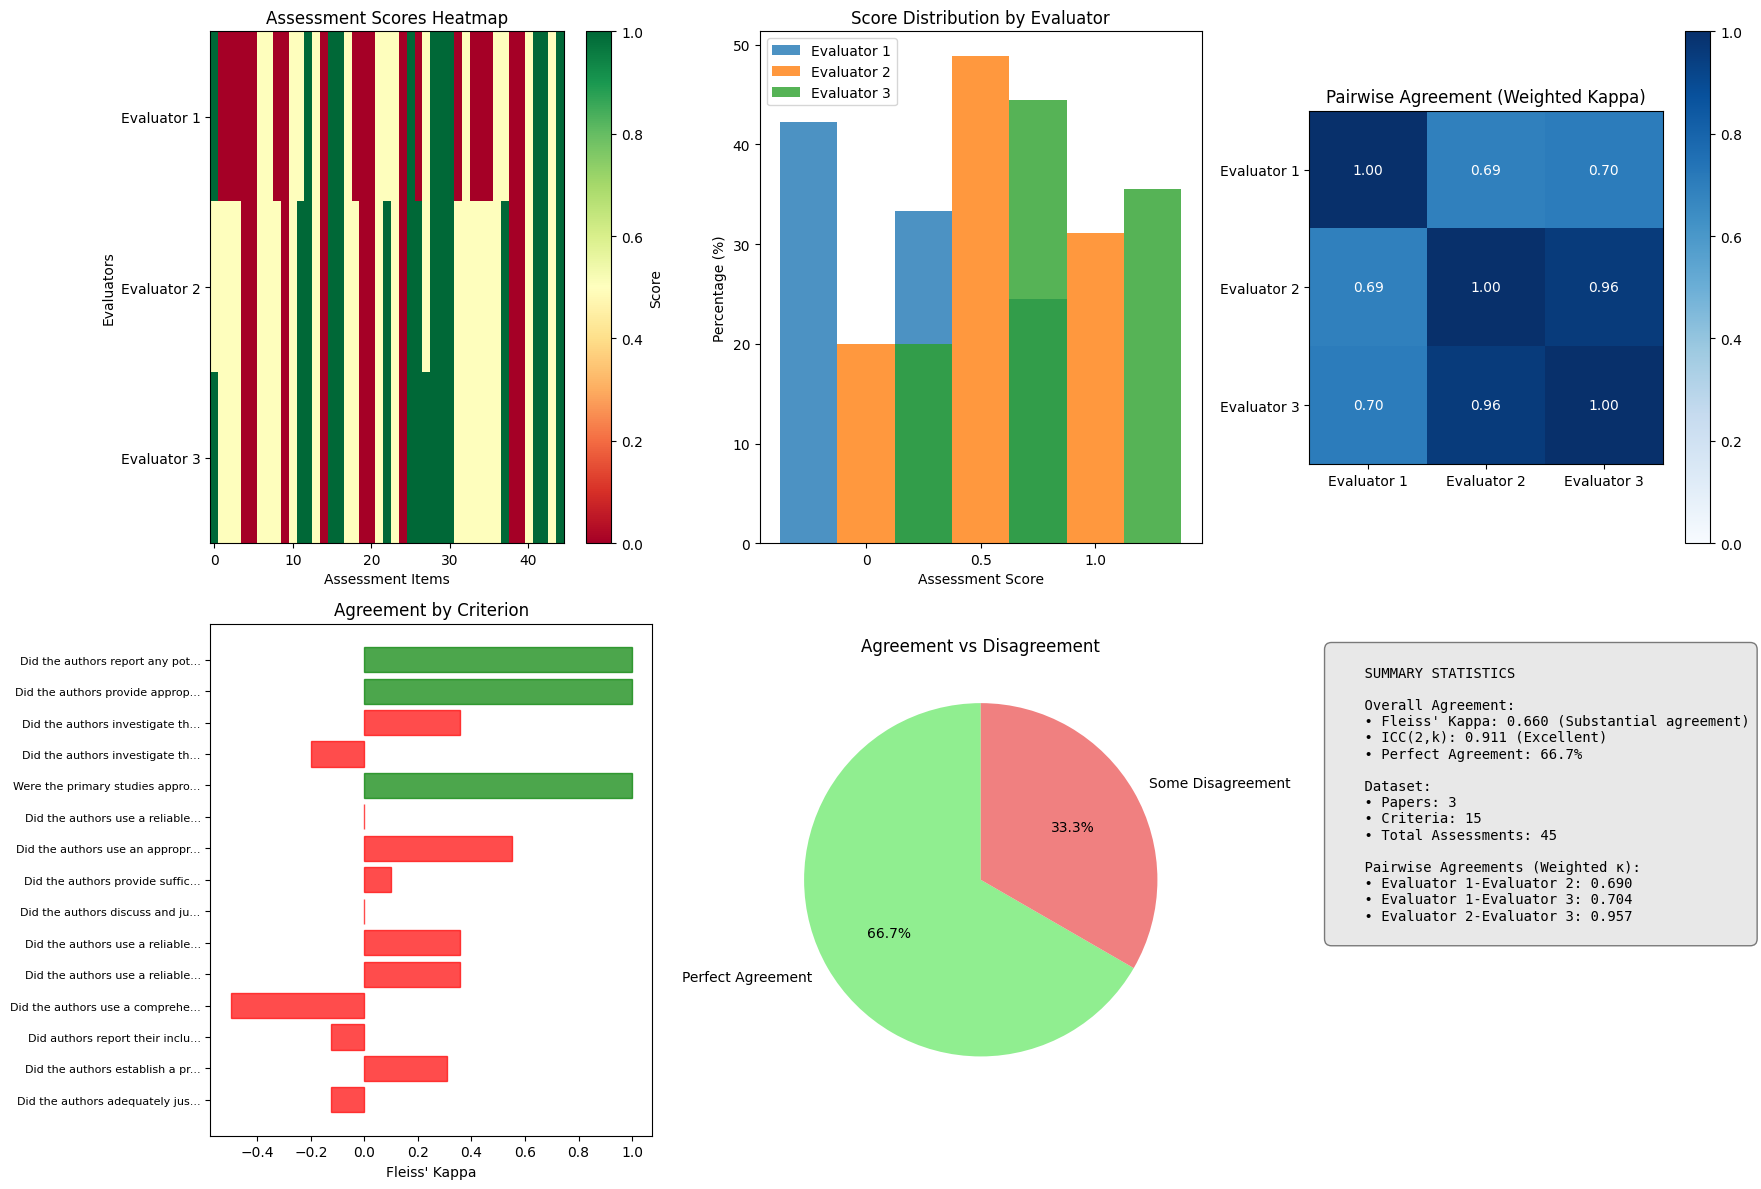


📋 COMPREHENSIVE SUMMARY REPORT
Dataset Overview:
  • 3 papers analyzed
  • 15 criteria evaluated
  • 45 total assessments
  • 3 evaluators: Evaluator 1, Evaluator 2, Evaluator 3

Overall Agreement Quality: Excellent
  • Fleiss' Kappa: 0.660 (Substantial agreement)
  • ICC(2,k): 0.911
  • Perfect Agreement Rate: 66.7%

Pairwise Agreement Rankings:
  1. Evaluator 2-Evaluator 3: κ = 0.957
  2. Evaluator 1-Evaluator 3: κ = 0.704
  3. Evaluator 1-Evaluator 2: κ = 0.690

Criteria with Highest Agreement:
  • Were the primary studies appropriately synthesized...: κ = 1.000
  • Did the authors provide appropriate recommendation...: κ = 1.000
  • Did the authors report any potential sources of co...: κ = 1.000

Criteria with Lowest Agreement:
  • Did authors report their inclusion and exclusion c...: κ = -0.125
  • Did the authors investigate the impact of individu...: κ = -0.200
  • Did the authors use a comprehensive literature sea...: κ = -0.500

✅ Analysis completed successfully!
Visualizat

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import cohen_kappa_score
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

def fleiss_kappa(ratings):
    """
    Calculate Fleiss' kappa for multiple raters
    ratings: numpy array of shape (n_subjects, n_raters)
    """
    n_sub, n_rater = ratings.shape

    # Create categories mapping
    categories = np.unique(ratings)
    k = len(categories)

    # Count matrix: subjects x categories
    count_matrix = np.zeros((n_sub, k))

    for i, subject_ratings in enumerate(ratings):
        for rating in subject_ratings:
            cat_idx = np.where(categories == rating)[0][0]
            count_matrix[i, cat_idx] += 1

    # Calculate P_i (proportion of agreement for each subject)
    P_i = np.sum(count_matrix * (count_matrix - 1), axis=1) / (n_rater * (n_rater - 1))
    P_bar = np.mean(P_i)

    # Calculate P_j (marginal probability for each category)
    P_j = np.sum(count_matrix, axis=0) / (n_sub * n_rater)
    P_e = np.sum(P_j ** 2)

    # Calculate Fleiss' kappa
    if P_e == 1:
        return 0.0

    kappa = (P_bar - P_e) / (1 - P_e)
    return kappa

def weighted_kappa(rater1, rater2, weights='quadratic'):
    """
    Calculate weighted Cohen's kappa between two raters
    """
    # Ensure inputs are numpy arrays
    rater1 = np.array(rater1)
    rater2 = np.array(rater2)

    # Create weight matrix for ordinal scale (0, 0.5, 1)
    categories = np.array([0.0, 0.5, 1.0])
    n_cats = len(categories)

    if weights == 'linear':
        weight_matrix = np.ones((n_cats, n_cats))
        for i in range(n_cats):
            for j in range(n_cats):
                weight_matrix[i, j] = 1 - abs(i - j) / (n_cats - 1)
    elif weights == 'quadratic':
        weight_matrix = np.ones((n_cats, n_cats))
        for i in range(n_cats):
            for j in range(n_cats):
                weight_matrix[i, j] = 1 - ((i - j) ** 2) / ((n_cats - 1) ** 2)

    # Convert ratings to category indices
    try:
        r1_idx = [np.where(categories == x)[0][0] for x in rater1]
        r2_idx = [np.where(categories == x)[0][0] for x in rater2]
    except IndexError as e:
        # Handle case where some values don't match expected categories
        print(f"Warning: Some values don't match expected categories (0, 0.5, 1.0)")
        print(f"Unique values in rater1: {np.unique(rater1)}")
        print(f"Unique values in rater2: {np.unique(rater2)}")

        # Map to nearest category
        r1_idx = []
        r2_idx = []
        for val in rater1:
            closest_idx = np.argmin(np.abs(categories - val))
            r1_idx.append(closest_idx)
        for val in rater2:
            closest_idx = np.argmin(np.abs(categories - val))
            r2_idx.append(closest_idx)

    # Create confusion matrix
    conf_matrix = np.zeros((n_cats, n_cats))
    for i, j in zip(r1_idx, r2_idx):
        conf_matrix[i, j] += 1

    # Calculate observed agreement
    po = np.sum(conf_matrix * weight_matrix) / np.sum(conf_matrix)

    # Calculate expected agreement
    marginal_r1 = np.sum(conf_matrix, axis=1) / np.sum(conf_matrix)
    marginal_r2 = np.sum(conf_matrix, axis=0) / np.sum(conf_matrix)

    expected_matrix = np.outer(marginal_r1, marginal_r2)
    pe = np.sum(expected_matrix * weight_matrix)

    # Calculate weighted kappa
    if pe == 1:
        return 0.0

    kappa = (po - pe) / (1 - pe)
    return kappa

def calculate_icc(ratings, type='ICC(2,k)'):
    """
    Calculate Intraclass Correlation Coefficient
    ratings: numpy array of shape (n_subjects, n_raters)
    """
    n_subjects, n_raters = ratings.shape

    # Calculate mean squares
    subject_means = np.mean(ratings, axis=1)
    grand_mean = np.mean(ratings)

    # Between subjects sum of squares
    BSS = n_raters * np.sum((subject_means - grand_mean) ** 2)

    # Within subjects sum of squares
    WSS = np.sum((ratings - subject_means.reshape(-1, 1)) ** 2)

    # Mean squares
    BMS = BSS / (n_subjects - 1)
    WMS = WSS / (n_subjects * (n_raters - 1))

    # ICC calculation
    if type == 'ICC(2,k)':
        icc = (BMS - WMS) / BMS
    elif type == 'ICC(2,1)':
        icc = (BMS - WMS) / (BMS + (n_raters - 1) * WMS)

    return max(0, icc)  # ICC cannot be negative in this context

def analyze_quality_assessment(file_path, sheet_name=None):
    """
    Main function to analyze quality assessment agreement from Excel file
    Modified to work with your specific data format
    """
    # Read Excel file
    try:
        if sheet_name:
            df = pd.read_excel(file_path, sheet_name=sheet_name)
        else:
            df = pd.read_excel(file_path)
        print(f"✅ Successfully loaded data: {df.shape}")
    except Exception as e:
        print(f"❌ Error reading file: {e}")
        return None

    # Display first few rows to understand structure
    print("\n📊 Data Preview:")
    print(df.head())
    print(f"\nColumns: {list(df.columns)}")

    # Define evaluators based on your data format
    # evaluators = ['Emilia', 'Adam', 'Saad']
    evaluators = ['Evaluator 1', 'Evaluator 2', 'Evaluator 3']

    # Check if all required columns exist
    required_columns = ['Paper', 'Criterion'] + evaluators
    missing_cols = [col for col in required_columns if col not in df.columns]
    if missing_cols:
        print(f"❌ Missing columns: {missing_cols}")
        print("Expected columns: Paper, Criterion, Evaluator 1, Evaluator 2, Evaluator 3")
        return None

    # Clean and prepare data
    print("\n🔧 Data Preparation:")

    # Remove any rows with missing values in evaluator columns
    initial_rows = len(df)
    df_clean = df.dropna(subset=evaluators)
    print(f"Removed {initial_rows - len(df_clean)} rows with missing evaluator scores")

    # Convert all evaluator columns to float and then round to handle precision issues
    for evaluator in evaluators:
        df_clean[evaluator] = pd.to_numeric(df_clean[evaluator], errors='coerce').round(1)

    # Verify that all scores are in the expected range [0, 0.5, 1]
    expected_scores = {0.0, 0.5, 1.0}
    for evaluator in evaluators:
        unique_scores = set(df_clean[evaluator].unique())
        # Remove any NaN values that might have been created
        unique_scores = {x for x in unique_scores if not pd.isna(x)}
        unexpected_scores = unique_scores - expected_scores
        if unexpected_scores:
            print(f"⚠️  Warning: {evaluator} has unexpected scores: {unexpected_scores}")
            # Optionally, you could map unexpected scores to nearest valid score
            # For now, we'll just warn the user

    # Remove any rows that still have NaN values after conversion
    df_clean = df_clean.dropna(subset=evaluators)

    # Extract ratings matrix
    ratings_data = df_clean[evaluators].values
    n_assessments, n_evaluators = ratings_data.shape

    print(f"\n📈 Analysis Setup:")
    print(f"Number of papers: {df_clean['Paper'].nunique()}")
    print(f"Number of criteria: {df_clean['Criterion'].nunique()}")
    print(f"Total assessments: {n_assessments}")
    print(f"Number of evaluators: {n_evaluators}")
    print(f"Score range: {np.min(ratings_data)} to {np.max(ratings_data)}")

    # Results dictionary
    results = {}
    results['data_info'] = {
        'n_papers': df_clean['Paper'].nunique(),
        'n_criteria': df_clean['Criterion'].nunique(),
        'n_assessments': n_assessments,
        'n_evaluators': n_evaluators
    }

    # 1. Overall Agreement Statistics
    print("\n" + "="*60)
    print("🔍 OVERALL AGREEMENT ANALYSIS")
    print("="*60)

    # Fleiss' Kappa
    fleiss_k = fleiss_kappa(ratings_data)
    results['fleiss_kappa'] = fleiss_k
    print(f"Fleiss' Kappa: {fleiss_k:.3f}")

    # Interpretation
    if fleiss_k < 0.20:
        interpretation = "Slight agreement"
    elif fleiss_k < 0.40:
        interpretation = "Fair agreement"
    elif fleiss_k < 0.60:
        interpretation = "Moderate agreement"
    elif fleiss_k < 0.80:
        interpretation = "Substantial agreement"
    else:
        interpretation = "Almost perfect agreement"

    print(f"Interpretation: {interpretation}")

    # ICC
    icc_value = calculate_icc(ratings_data)
    results['icc'] = icc_value
    print(f"ICC(2,k): {icc_value:.3f}")

    if icc_value > 0.90:
        icc_interp = "Excellent"
    elif icc_value > 0.75:
        icc_interp = "Good"
    elif icc_value > 0.50:
        icc_interp = "Moderate"
    else:
        icc_interp = "Poor"

    print(f"ICC Interpretation: {icc_interp}")

    # 2. Pairwise Agreement
    print("\n" + "="*60)
    print("👥 PAIRWISE AGREEMENT ANALYSIS")
    print("="*60)

    pairwise_results = {}

    for i, j in combinations(range(n_evaluators), 2):
        eval1, eval2 = evaluators[i], evaluators[j]

        # Convert to integers for cohen_kappa_score (0->0, 0.5->1, 1.0->2)
        r1_int = [int(x * 2) for x in ratings_data[:, i]]  # [0, 1, 2]
        r2_int = [int(x * 2) for x in ratings_data[:, j]]  # [0, 1, 2]

        # Regular Cohen's Kappa (using integer mapping)
        try:
            regular_kappa = cohen_kappa_score(r1_int, r2_int)
        except Exception as e:
            print(f"Warning: Could not calculate regular kappa for {eval1}-{eval2}: {e}")
            regular_kappa = np.nan

        # Weighted Kappa (using our custom function)
        weighted_k = weighted_kappa(ratings_data[:, i], ratings_data[:, j])

        # Pearson correlation
        correlation, p_value = stats.pearsonr(ratings_data[:, i], ratings_data[:, j])

        pairwise_results[f"{eval1}-{eval2}"] = {
            'regular_kappa': regular_kappa,
            'weighted_kappa': weighted_k,
            'pearson_correlation': correlation,
            'p_value': p_value
        }

        print(f"{eval1} vs {eval2}:")
        print(f"  Regular Kappa: {regular_kappa:.3f}")
        print(f"  Weighted Kappa: {weighted_k:.3f}")
        print(f"  Pearson Correlation: {correlation:.3f} (p={p_value:.3f})")

    results['pairwise'] = pairwise_results

    # 3. Score Distribution Analysis
    print("\n" + "="*60)
    print("📊 SCORE DISTRIBUTION ANALYSIS")
    print("="*60)

    score_dist = {}
    for i, evaluator in enumerate(evaluators):
        scores = ratings_data[:, i]
        unique, counts = np.unique(scores, return_counts=True)
        distribution = dict(zip(unique, counts))
        score_dist[evaluator] = distribution

        print(f"{evaluator}:")
        for score, count in sorted(distribution.items()):
            percentage = (count / len(scores)) * 100
            print(f"  Score {score}: {count} ({percentage:.1f}%)")

        # Calculate mean and std
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        print(f"  Mean: {mean_score:.3f}, Std: {std_score:.3f}")

    results['score_distribution'] = score_dist

    # 4. Perfect Agreement Analysis
    print("\n" + "="*60)
    print("🎯 PERFECT AGREEMENT ANALYSIS")
    print("="*60)

    perfect_agreements = 0
    disagreement_patterns = []

    for i in range(n_assessments):
        row_scores = ratings_data[i, :]
        if len(np.unique(row_scores)) == 1:
            perfect_agreements += 1
        else:
            disagreement_patterns.append(row_scores)

    perfect_agreement_rate = (perfect_agreements / n_assessments) * 100
    results['perfect_agreement_rate'] = perfect_agreement_rate

    print(f"Perfect agreements: {perfect_agreements}/{n_assessments} ({perfect_agreement_rate:.1f}%)")

    # 5. Disagreement Pattern Analysis
    if disagreement_patterns:
        print(f"\nDisagreement patterns ({len(disagreement_patterns)} cases):")
        disagreement_array = np.array(disagreement_patterns)

        # Most common disagreement patterns
        unique_patterns, pattern_counts = np.unique(disagreement_array, axis=0, return_counts=True)

        # Sort by frequency
        sorted_indices = np.argsort(pattern_counts)[::-1]

        print("Most common disagreement patterns:")
        for idx in sorted_indices[:5]:  # Show top 5
            pattern = unique_patterns[idx]
            count = pattern_counts[idx]
            print(f"  {evaluators[0]}={pattern[0]}, {evaluators[1]}={pattern[1]}, {evaluators[2]}={pattern[2]} → {count} times")

    # 6. Analysis by Paper and Criterion
    print("\n" + "="*60)
    print("📋 DETAILED BREAKDOWN ANALYSIS")
    print("="*60)

    # Agreement by paper
    paper_agreement = {}
    for paper in df_clean['Paper'].unique():
        paper_data = df_clean[df_clean['Paper'] == paper][evaluators].values
        if len(paper_data) > 1:  # Need at least 2 assessments for agreement calculation
            paper_fleiss = fleiss_kappa(paper_data)
            paper_agreement[paper] = paper_fleiss

    if paper_agreement:
        print("Agreement by Paper (Fleiss' Kappa):")
        sorted_papers = sorted(paper_agreement.items(), key=lambda x: x[1], reverse=True)
        for paper, kappa in sorted_papers[:5]:  # Show top 5
            print(f"  {paper[:50]}{'...' if len(paper) > 50 else ''}: {kappa:.3f}")

    # Agreement by criterion
    criterion_agreement = {}
    for criterion in df_clean['Criterion'].unique():
        criterion_data = df_clean[df_clean['Criterion'] == criterion][evaluators].values
        if len(criterion_data) > 1:  # Need at least 2 assessments
            criterion_fleiss = fleiss_kappa(criterion_data)
            criterion_agreement[criterion] = criterion_fleiss

    if criterion_agreement:
        print("\nAgreement by Criterion (Fleiss' Kappa):")
        sorted_criteria = sorted(criterion_agreement.items(), key=lambda x: x[1], reverse=True)
        for criterion, kappa in sorted_criteria:
            print(f"  {criterion[:60]}{'...' if len(criterion) > 60 else ''}: {kappa:.3f}")

    results['paper_agreement'] = paper_agreement
    results['criterion_agreement'] = criterion_agreement

    # 7. Create Visualizations
    print("\n" + "="*60)
    print("📈 GENERATING VISUALIZATIONS")
    print("="*60)

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # 1. Ratings heatmap
    ax1 = axes[0, 0]
    im = ax1.imshow(ratings_data.T, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    ax1.set_yticks(range(n_evaluators))
    ax1.set_yticklabels(evaluators)
    ax1.set_xlabel('Assessment Items')
    ax1.set_ylabel('Evaluators')
    ax1.set_title('Assessment Scores Heatmap')
    plt.colorbar(im, ax=ax1, label='Score')

    # 2. Score distribution
    ax2 = axes[0, 1]
    x_pos = np.array([0, 0.5, 1.0])
    width = 0.25

    for i, evaluator in enumerate(evaluators):
        scores = ratings_data[:, i]
        counts = [np.sum(scores == score) for score in [0, 0.5, 1.0]]
        percentages = [c/len(scores)*100 for c in counts]
        ax2.bar(x_pos + i*width, percentages, width, label=evaluator, alpha=0.8)

    ax2.set_xlabel('Assessment Score')
    ax2.set_ylabel('Percentage (%)')
    ax2.set_title('Score Distribution by Evaluator')
    ax2.set_xticks(x_pos + width)
    ax2.set_xticklabels(['0', '0.5', '1.0'])
    ax2.legend()

    # 3. Agreement matrix
    ax3 = axes[0, 2]
    agreement_matrix = np.zeros((n_evaluators, n_evaluators))
    for i in range(n_evaluators):
        for j in range(n_evaluators):
            if i == j:
                agreement_matrix[i, j] = 1.0
            else:
                key1 = f"{evaluators[i]}-{evaluators[j]}"
                key2 = f"{evaluators[j]}-{evaluators[i]}"
                if key1 in pairwise_results:
                    agreement_matrix[i, j] = pairwise_results[key1]['weighted_kappa']
                elif key2 in pairwise_results:
                    agreement_matrix[i, j] = pairwise_results[key2]['weighted_kappa']

    im3 = ax3.imshow(agreement_matrix, cmap='Blues', vmin=0, vmax=1)
    ax3.set_xticks(range(n_evaluators))
    ax3.set_yticks(range(n_evaluators))
    ax3.set_xticklabels(evaluators)
    ax3.set_yticklabels(evaluators)
    ax3.set_title('Pairwise Agreement (Weighted Kappa)')

    # Add text annotations
    for i in range(n_evaluators):
        for j in range(n_evaluators):
            text = ax3.text(j, i, f'{agreement_matrix[i, j]:.2f}',
                           ha="center", va="center", color="black" if agreement_matrix[i, j] < 0.5 else "white")

    plt.colorbar(im3, ax=ax3)

    # 4. Criterion agreement (if available)
    if criterion_agreement:
        ax4 = axes[1, 0]
        criteria = list(criterion_agreement.keys())
        kappa_values = list(criterion_agreement.values())

        # Truncate long criterion names for display
        display_criteria = [c[:30] + '...' if len(c) > 30 else c for c in criteria]

        y_pos = np.arange(len(criteria))
        bars = ax4.barh(y_pos, kappa_values, alpha=0.7)
        ax4.set_yticks(y_pos)
        ax4.set_yticklabels(display_criteria, fontsize=8)
        ax4.set_xlabel('Fleiss\' Kappa')
        ax4.set_title('Agreement by Criterion')

        # Color bars based on agreement level
        for bar, kappa in zip(bars, kappa_values):
            if kappa >= 0.8:
                bar.set_color('green')
            elif kappa >= 0.6:
                bar.set_color('orange')
            else:
                bar.set_color('red')

    # 5. Perfect agreement rate
    ax5 = axes[1, 1]
    perfect_rate = perfect_agreement_rate
    disagreement_rate = 100 - perfect_rate

    labels = ['Perfect Agreement', 'Some Disagreement']
    sizes = [perfect_rate, disagreement_rate]
    colors = ['lightgreen', 'lightcoral']

    ax5.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax5.set_title('Agreement vs Disagreement')

    # 6. Summary metrics
    ax6 = axes[1, 2]
    ax6.axis('off')

    summary_text = f"""
    SUMMARY STATISTICS

    Overall Agreement:
    • Fleiss' Kappa: {fleiss_k:.3f} ({interpretation})
    • ICC(2,k): {icc_value:.3f} ({icc_interp})
    • Perfect Agreement: {perfect_agreement_rate:.1f}%

    Dataset:
    • Papers: {df_clean['Paper'].nunique()}
    • Criteria: {df_clean['Criterion'].nunique()}
    • Total Assessments: {n_assessments}

    Pairwise Agreements (Weighted κ):
    """

    for pair, data in pairwise_results.items():
        summary_text += f"• {pair}: {data['weighted_kappa']:.3f}\n    "

    ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes, fontsize=10,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.5))

    plt.tight_layout()
    plt.savefig('quality_assessment_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 8. Summary Report
    print("\n" + "="*60)
    print("📋 COMPREHENSIVE SUMMARY REPORT")
    print("="*60)

    print(f"Dataset Overview:")
    print(f"  • {df_clean['Paper'].nunique()} papers analyzed")
    print(f"  • {df_clean['Criterion'].nunique()} criteria evaluated")
    print(f"  • {n_assessments} total assessments")
    print(f"  • 3 evaluators: {', '.join(evaluators)}")

    print(f"\nOverall Agreement Quality: {icc_interp}")
    print(f"  • Fleiss' Kappa: {fleiss_k:.3f} ({interpretation})")
    print(f"  • ICC(2,k): {icc_value:.3f}")
    print(f"  • Perfect Agreement Rate: {perfect_agreement_rate:.1f}%")

    # Most and least agreeable evaluator pairs
    kappa_values = [(pair, data['weighted_kappa']) for pair, data in pairwise_results.items()]
    kappa_values.sort(key=lambda x: x[1], reverse=True)

    print(f"\nPairwise Agreement Rankings:")
    for i, (pair, kappa) in enumerate(kappa_values, 1):
        print(f"  {i}. {pair}: κ = {kappa:.3f}")

    # Most/least agreed criteria
    if criterion_agreement:
        sorted_criteria = sorted(criterion_agreement.items(), key=lambda x: x[1], reverse=True)
        print(f"\nCriteria with Highest Agreement:")
        for criterion, kappa in sorted_criteria[:3]:
            print(f"  • {criterion[:50]}{'...' if len(criterion) > 50 else ''}: κ = {kappa:.3f}")

        print(f"\nCriteria with Lowest Agreement:")
        for criterion, kappa in sorted_criteria[-3:]:
            print(f"  • {criterion[:50]}{'...' if len(criterion) > 50 else ''}: κ = {kappa:.3f}")

    return results

# Direct data analysis function for when you have the data in the exact format shown
def analyze_from_dataframe(df):
    """
    Analyze quality assessment data directly from a pandas DataFrame
    Expected columns: Paper, Criterion, Evaluator 1, Evaluator 2, Evaluator 3
    """
    return analyze_quality_assessment_from_df(df)

def analyze_quality_assessment_from_df(df):
    """
    Analyze quality assessment agreement from pandas DataFrame
    """
    print(f"✅ Analyzing data: {df.shape}")

    # Display first few rows
    print("\n📊 Data Preview:")
    print(df.head())

    evaluators = ['Evaluator 1', 'Evaluator 2', 'Evaluator 3']

    # Check columns
    required_columns = ['Paper', 'Criterion'] + evaluators
    missing_cols = [col for col in required_columns if col not in df.columns]
    if missing_cols:
        print(f"❌ Missing columns: {missing_cols}")
        return None

    # Clean data
    df_clean = df.dropna(subset=evaluators)
    ratings_data = df_clean[evaluators].values

    # Run the same analysis as the file-based function
    results = {}

    # Basic statistics
    n_assessments, n_evaluators = ratings_data.shape
    print(f"\n📈 Analysis Setup:")
    print(f"Number of papers: {df_clean['Paper'].nunique()}")
    print(f"Number of criteria: {df_clean['Criterion'].nunique()}")
    print(f"Total assessments: {n_assessments}")

    # Calculate agreement metrics
    fleiss_k = fleiss_kappa(ratings_data)
    icc_value = calculate_icc(ratings_data)

    print(f"\n🔍 OVERALL AGREEMENT:")
    print(f"Fleiss' Kappa: {fleiss_k:.3f}")
    print(f"ICC(2,k): {icc_value:.3f}")

    # Pairwise analysis
    print(f"\n👥 PAIRWISE AGREEMENT:")
    for i, j in combinations(range(n_evaluators), 2):
        eval1, eval2 = evaluators[i], evaluators[j]
        weighted_k = weighted_kappa(ratings_data[:, i], ratings_data[:, j])
        print(f"{eval1} vs {eval2}: κ = {weighted_k:.3f}")

    results['fleiss_kappa'] = fleiss_k
    results['icc'] = icc_value

    return results

# Example usage for your specific data format
if __name__ == "__main__":
    # Method 1: From Excel file
    file_path = "data1.xlsx"  # Replace with your file path
    results = analyze_quality_assessment(file_path)

    # Method 2: From DataFrame (if you have the data loaded already)
    # df = pd.read_excel("your_file.xlsx")  # or however you load your data
    # results = analyze_from_dataframe(df)

    if results:
        print("\n✅ Analysis completed successfully!")
        print("Visualization saved as 'quality_assessment_analysis.png'")
    else:
        print("\n❌ Analysis failed. Please check your data format.")

using above code, but generating seperate images for each assessment.

✅ Successfully loaded data: (45, 5)

📊 Data Preview:
                                               Paper  \
0  Exploring the application of artificial intell...   
1  Exploring the application of artificial intell...   
2  Exploring the application of artificial intell...   
3  Exploring the application of artificial intell...   
4  Exploring the application of artificial intell...   

                                           Criterion  Evaluator 1  \
0  Did the authors adequately justify the need fo...          1.0   
1  Did the authors establish a protocol prior to ...          0.0   
2  Did authors report their inclusion and exclusi...          0.0   
3  Did the authors use a comprehensive literature...          0.0   
4  Did the authors use a reliable study selection...          0.0   

   Evaluator 2  Evaluator 3  
0          0.5          1.0  
1          0.5          0.5  
2          0.5          0.5  
3          0.5          0.5  
4          0.0          0.0  

Columns: ['Pap

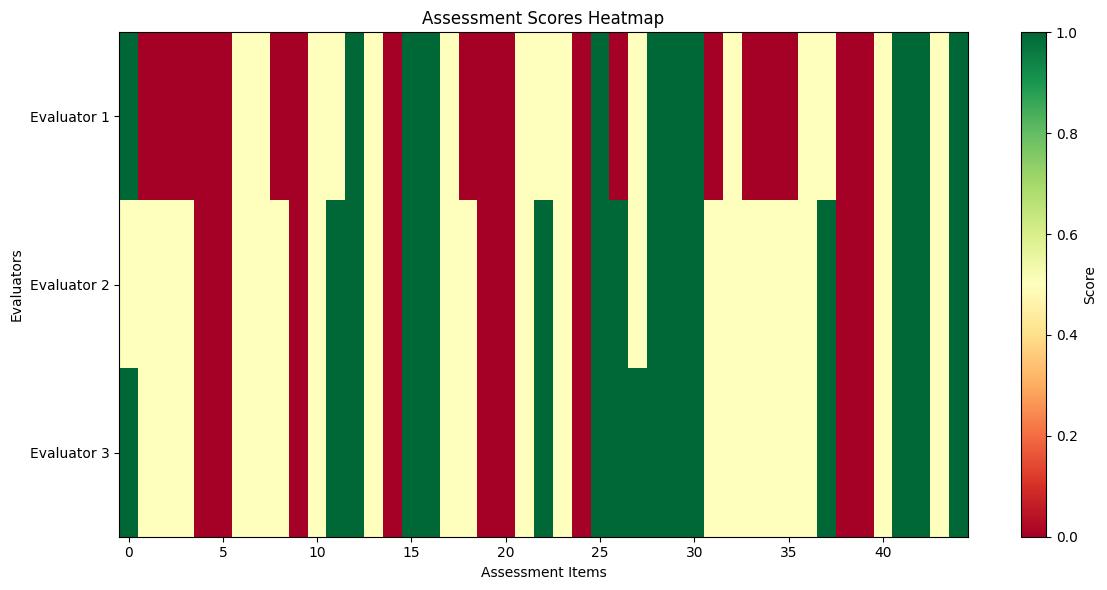

✅ Saved: assessment_scores_heatmap.png


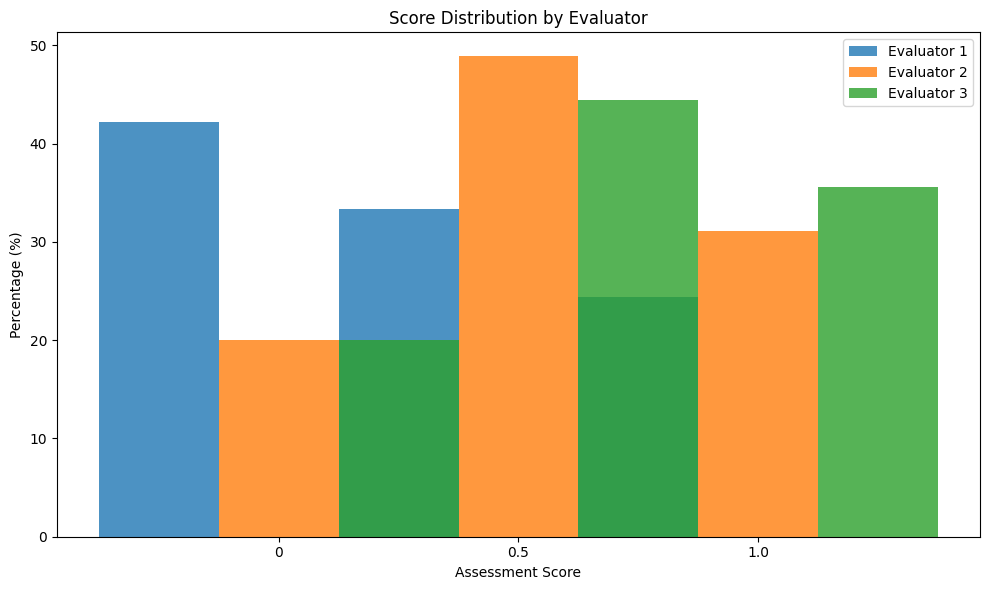

✅ Saved: score_distribution_by_evaluator.png


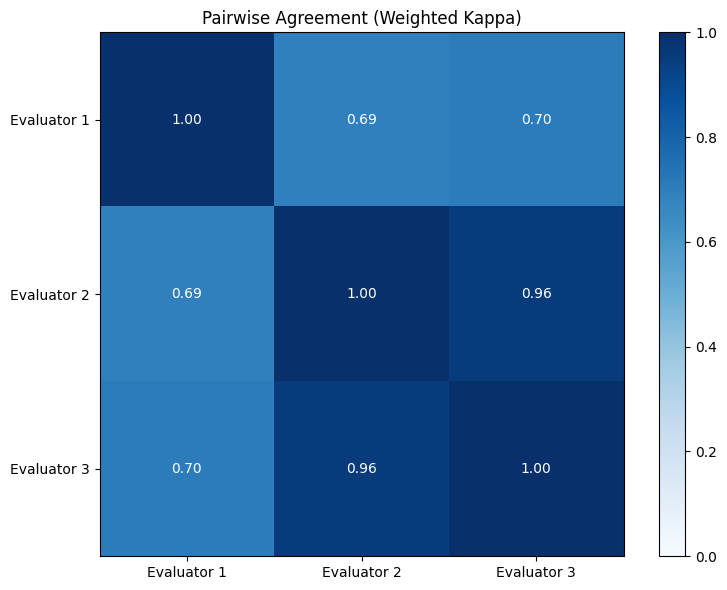

✅ Saved: pairwise_agreement_matrix.png


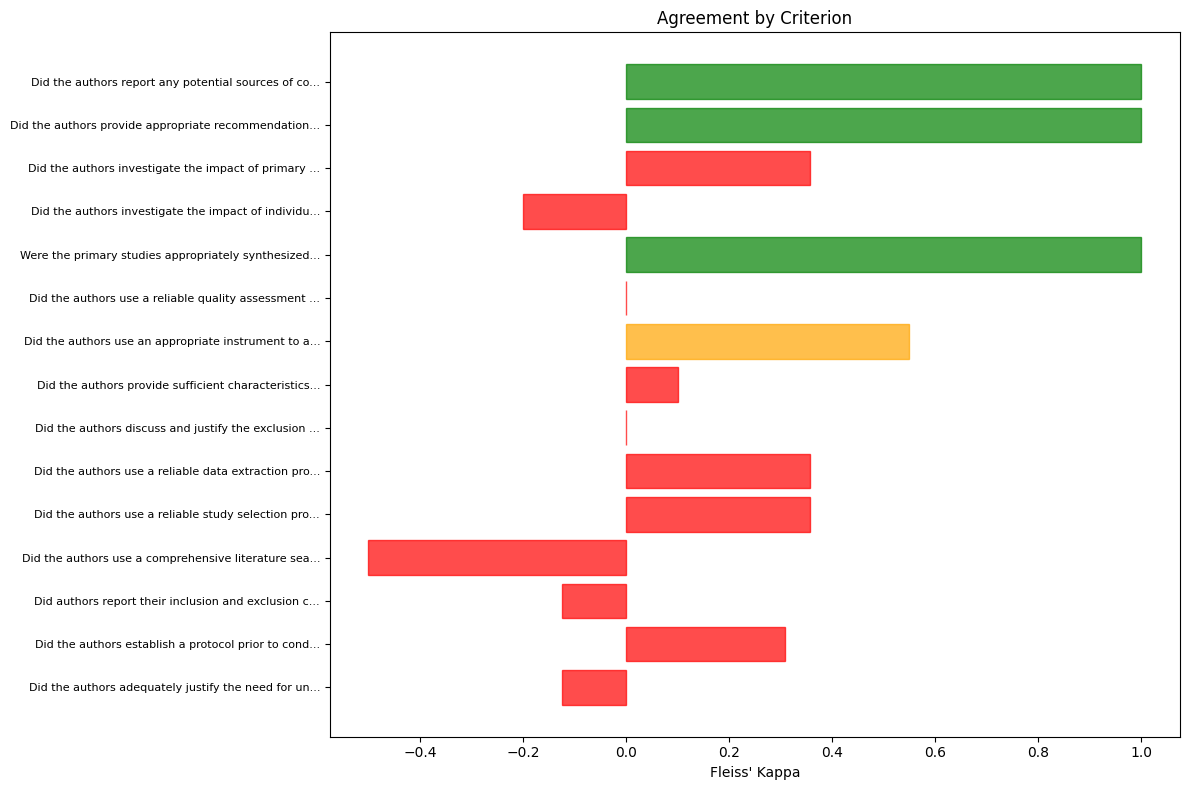

✅ Saved: agreement_by_criterion.png


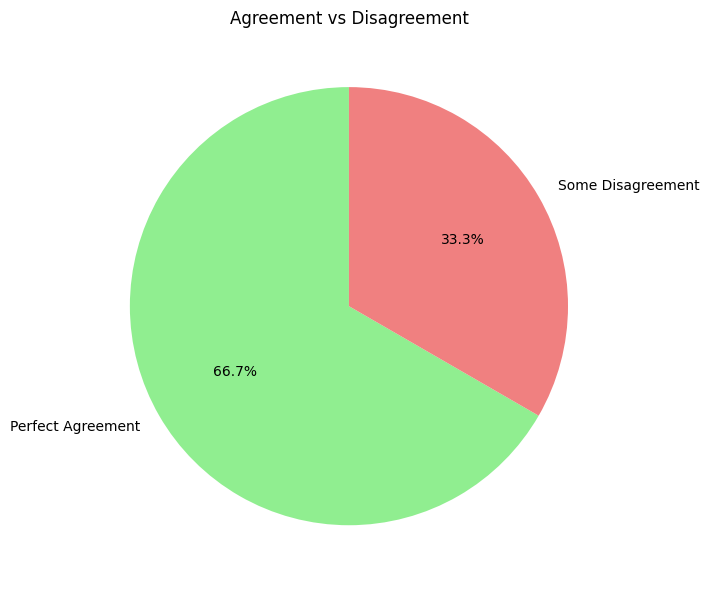

✅ Saved: agreement_vs_disagreement.png


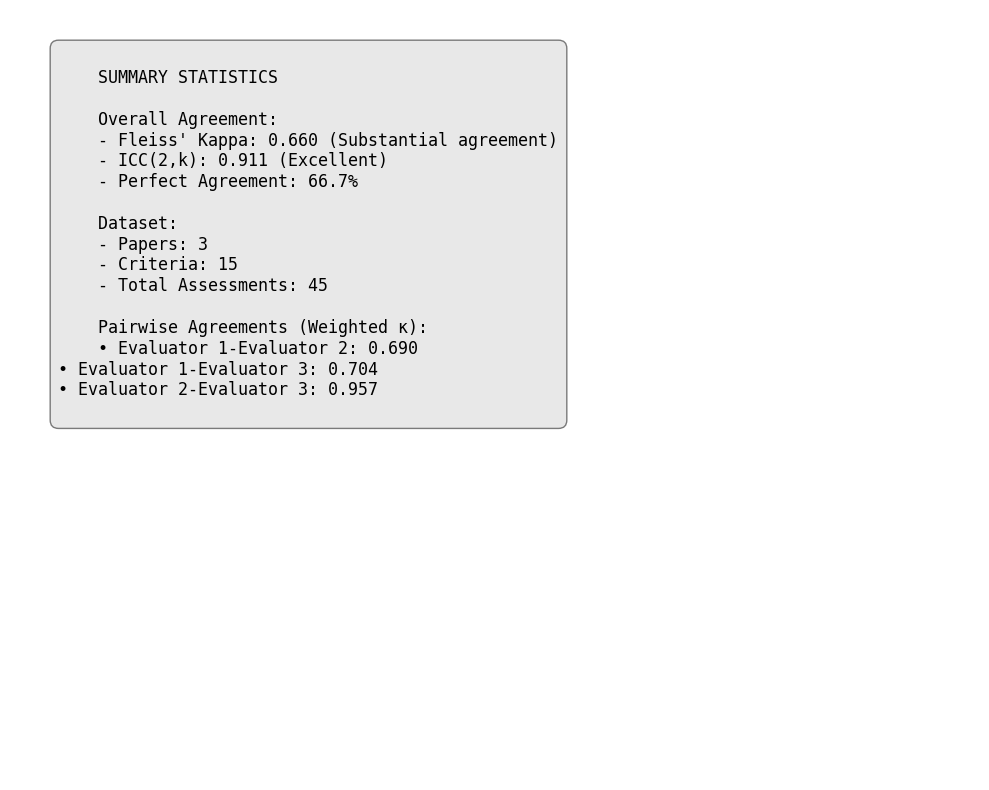

✅ Saved: statistical_summary.png

✅ All individual visualizations saved successfully!
Files created:
  • assessment_scores_heatmap.png
  • score_distribution_by_evaluator.png
  • pairwise_agreement_matrix.png
  • agreement_by_criterion.png
  • agreement_vs_disagreement.png
  • statistical_summary.png

Pairwise Agreement Rankings:
  1. Evaluator 2-Evaluator 3: κ = 0.957
  2. Evaluator 1-Evaluator 3: κ = 0.704
  3. Evaluator 1-Evaluator 2: κ = 0.690

Criteria with Highest Agreement:
  • Were the primary studies appropriately synthesized...: κ = 1.000
  • Did the authors provide appropriate recommendation...: κ = 1.000
  • Did the authors report any potential sources of co...: κ = 1.000

Criteria with Lowest Agreement:
  • Did authors report their inclusion and exclusion c...: κ = -0.125
  • Did the authors investigate the impact of individu...: κ = -0.200
  • Did the authors use a comprehensive literature sea...: κ = -0.500

✅ Analysis completed successfully!
Visualization saved as 'qual

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import cohen_kappa_score
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

def fleiss_kappa(ratings):
    """
    Calculate Fleiss' kappa for multiple raters
    ratings: numpy array of shape (n_subjects, n_raters)
    """
    n_sub, n_rater = ratings.shape

    # Create categories mapping
    categories = np.unique(ratings)
    k = len(categories)

    # Count matrix: subjects x categories
    count_matrix = np.zeros((n_sub, k))

    for i, subject_ratings in enumerate(ratings):
        for rating in subject_ratings:
            cat_idx = np.where(categories == rating)[0][0]
            count_matrix[i, cat_idx] += 1

    # Calculate P_i (proportion of agreement for each subject)
    P_i = np.sum(count_matrix * (count_matrix - 1), axis=1) / (n_rater * (n_rater - 1))
    P_bar = np.mean(P_i)

    # Calculate P_j (marginal probability for each category)
    P_j = np.sum(count_matrix, axis=0) / (n_sub * n_rater)
    P_e = np.sum(P_j ** 2)

    # Calculate Fleiss' kappa
    if P_e == 1:
        return 0.0

    kappa = (P_bar - P_e) / (1 - P_e)
    return kappa

def weighted_kappa(rater1, rater2, weights='quadratic'):
    """
    Calculate weighted Cohen's kappa between two raters
    """
    # Ensure inputs are numpy arrays
    rater1 = np.array(rater1)
    rater2 = np.array(rater2)

    # Create weight matrix for ordinal scale (0, 0.5, 1)
    categories = np.array([0.0, 0.5, 1.0])
    n_cats = len(categories)

    if weights == 'linear':
        weight_matrix = np.ones((n_cats, n_cats))
        for i in range(n_cats):
            for j in range(n_cats):
                weight_matrix[i, j] = 1 - abs(i - j) / (n_cats - 1)
    elif weights == 'quadratic':
        weight_matrix = np.ones((n_cats, n_cats))
        for i in range(n_cats):
            for j in range(n_cats):
                weight_matrix[i, j] = 1 - ((i - j) ** 2) / ((n_cats - 1) ** 2)

    # Convert ratings to category indices
    try:
        r1_idx = [np.where(categories == x)[0][0] for x in rater1]
        r2_idx = [np.where(categories == x)[0][0] for x in rater2]
    except IndexError as e:
        # Handle case where some values don't match expected categories
        print(f"Warning: Some values don't match expected categories (0, 0.5, 1.0)")
        print(f"Unique values in rater1: {np.unique(rater1)}")
        print(f"Unique values in rater2: {np.unique(rater2)}")

        # Map to nearest category
        r1_idx = []
        r2_idx = []
        for val in rater1:
            closest_idx = np.argmin(np.abs(categories - val))
            r1_idx.append(closest_idx)
        for val in rater2:
            closest_idx = np.argmin(np.abs(categories - val))
            r2_idx.append(closest_idx)

    # Create confusion matrix
    conf_matrix = np.zeros((n_cats, n_cats))
    for i, j in zip(r1_idx, r2_idx):
        conf_matrix[i, j] += 1

    # Calculate observed agreement
    po = np.sum(conf_matrix * weight_matrix) / np.sum(conf_matrix)

    # Calculate expected agreement
    marginal_r1 = np.sum(conf_matrix, axis=1) / np.sum(conf_matrix)
    marginal_r2 = np.sum(conf_matrix, axis=0) / np.sum(conf_matrix)

    expected_matrix = np.outer(marginal_r1, marginal_r2)
    pe = np.sum(expected_matrix * weight_matrix)

    # Calculate weighted kappa
    if pe == 1:
        return 0.0

    kappa = (po - pe) / (1 - pe)
    return kappa

def calculate_icc(ratings, type='ICC(2,k)'):
    """
    Calculate Intraclass Correlation Coefficient
    ratings: numpy array of shape (n_subjects, n_raters)
    """
    n_subjects, n_raters = ratings.shape

    # Calculate mean squares
    subject_means = np.mean(ratings, axis=1)
    grand_mean = np.mean(ratings)

    # Between subjects sum of squares
    BSS = n_raters * np.sum((subject_means - grand_mean) ** 2)

    # Within subjects sum of squares
    WSS = np.sum((ratings - subject_means.reshape(-1, 1)) ** 2)

    # Mean squares
    BMS = BSS / (n_subjects - 1)
    WMS = WSS / (n_subjects * (n_raters - 1))

    # ICC calculation
    if type == 'ICC(2,k)':
        icc = (BMS - WMS) / BMS
    elif type == 'ICC(2,1)':
        icc = (BMS - WMS) / (BMS + (n_raters - 1) * WMS)

    return max(0, icc)  # ICC cannot be negative in this context

def analyze_quality_assessment(file_path, sheet_name=None):
    """
    Main function to analyze quality assessment agreement from Excel file
    Modified to work with your specific data format
    """
    # Read Excel file
    try:
        if sheet_name:
            df = pd.read_excel(file_path, sheet_name=sheet_name)
        else:
            df = pd.read_excel(file_path)
        print(f"✅ Successfully loaded data: {df.shape}")
    except Exception as e:
        print(f"❌ Error reading file: {e}")
        return None

    # Display first few rows to understand structure
    print("\n📊 Data Preview:")
    print(df.head())
    print(f"\nColumns: {list(df.columns)}")

    # Define evaluators based on your data format
    # evaluators = ['Emilia', 'Adam', 'Saad']
    evaluators = ['Evaluator 1', 'Evaluator 2', 'Evaluator 3']

    # Check if all required columns exist
    required_columns = ['Paper', 'Criterion'] + evaluators
    missing_cols = [col for col in required_columns if col not in df.columns]
    if missing_cols:
        print(f"❌ Missing columns: {missing_cols}")
        print("Expected columns: Paper, Criterion, Evaluator 1, Evaluator 2, Evaluator 3")
        return None

    # Clean and prepare data
    print("\n🔧 Data Preparation:")

    # Remove any rows with missing values in evaluator columns
    initial_rows = len(df)
    df_clean = df.dropna(subset=evaluators)
    print(f"Removed {initial_rows - len(df_clean)} rows with missing evaluator scores")

    # Convert all evaluator columns to float and then round to handle precision issues
    for evaluator in evaluators:
        df_clean[evaluator] = pd.to_numeric(df_clean[evaluator], errors='coerce').round(1)

    # Verify that all scores are in the expected range [0, 0.5, 1]
    expected_scores = {0.0, 0.5, 1.0}
    for evaluator in evaluators:
        unique_scores = set(df_clean[evaluator].unique())
        # Remove any NaN values that might have been created
        unique_scores = {x for x in unique_scores if not pd.isna(x)}
        unexpected_scores = unique_scores - expected_scores
        if unexpected_scores:
            print(f"⚠️  Warning: {evaluator} has unexpected scores: {unexpected_scores}")
            # Optionally, you could map unexpected scores to nearest valid score
            # For now, we'll just warn the user

    # Remove any rows that still have NaN values after conversion
    df_clean = df_clean.dropna(subset=evaluators)

    # Extract ratings matrix
    ratings_data = df_clean[evaluators].values
    n_assessments, n_evaluators = ratings_data.shape

    print(f"\n📈 Analysis Setup:")
    print(f"Number of papers: {df_clean['Paper'].nunique()}")
    print(f"Number of criteria: {df_clean['Criterion'].nunique()}")
    print(f"Total assessments: {n_assessments}")
    print(f"Number of evaluators: {n_evaluators}")
    print(f"Score range: {np.min(ratings_data)} to {np.max(ratings_data)}")

    # Results dictionary
    results = {}
    results['data_info'] = {
        'n_papers': df_clean['Paper'].nunique(),
        'n_criteria': df_clean['Criterion'].nunique(),
        'n_assessments': n_assessments,
        'n_evaluators': n_evaluators
    }

    # 1. Overall Agreement Statistics
    print("\n" + "="*60)
    print("🔍 OVERALL AGREEMENT ANALYSIS")
    print("="*60)

    # Fleiss' Kappa
    fleiss_k = fleiss_kappa(ratings_data)
    results['fleiss_kappa'] = fleiss_k
    print(f"Fleiss' Kappa: {fleiss_k:.3f}")

    # Interpretation
    if fleiss_k < 0.20:
        interpretation = "Slight agreement"
    elif fleiss_k < 0.40:
        interpretation = "Fair agreement"
    elif fleiss_k < 0.60:
        interpretation = "Moderate agreement"
    elif fleiss_k < 0.80:
        interpretation = "Substantial agreement"
    else:
        interpretation = "Almost perfect agreement"

    print(f"Interpretation: {interpretation}")

    # ICC
    icc_value = calculate_icc(ratings_data)
    results['icc'] = icc_value
    print(f"ICC(2,k): {icc_value:.3f}")

    if icc_value > 0.90:
        icc_interp = "Excellent"
    elif icc_value > 0.75:
        icc_interp = "Good"
    elif icc_value > 0.50:
        icc_interp = "Moderate"
    else:
        icc_interp = "Poor"

    print(f"ICC Interpretation: {icc_interp}")

    # 2. Pairwise Agreement
    print("\n" + "="*60)
    print("👥 PAIRWISE AGREEMENT ANALYSIS")
    print("="*60)

    pairwise_results = {}

    for i, j in combinations(range(n_evaluators), 2):
        eval1, eval2 = evaluators[i], evaluators[j]

        # Convert to integers for cohen_kappa_score (0->0, 0.5->1, 1.0->2)
        r1_int = [int(x * 2) for x in ratings_data[:, i]]  # [0, 1, 2]
        r2_int = [int(x * 2) for x in ratings_data[:, j]]  # [0, 1, 2]

        # Regular Cohen's Kappa (using integer mapping)
        try:
            regular_kappa = cohen_kappa_score(r1_int, r2_int)
        except Exception as e:
            print(f"Warning: Could not calculate regular kappa for {eval1}-{eval2}: {e}")
            regular_kappa = np.nan

        # Weighted Kappa (using our custom function)
        weighted_k = weighted_kappa(ratings_data[:, i], ratings_data[:, j])

        # Pearson correlation
        correlation, p_value = stats.pearsonr(ratings_data[:, i], ratings_data[:, j])

        pairwise_results[f"{eval1}-{eval2}"] = {
            'regular_kappa': regular_kappa,
            'weighted_kappa': weighted_k,
            'pearson_correlation': correlation,
            'p_value': p_value
        }

        print(f"{eval1} vs {eval2}:")
        print(f"  Regular Kappa: {regular_kappa:.3f}")
        print(f"  Weighted Kappa: {weighted_k:.3f}")
        print(f"  Pearson Correlation: {correlation:.3f} (p={p_value:.3f})")

    results['pairwise'] = pairwise_results

    # 3. Score Distribution Analysis
    print("\n" + "="*60)
    print("📊 SCORE DISTRIBUTION ANALYSIS")
    print("="*60)

    score_dist = {}
    for i, evaluator in enumerate(evaluators):
        scores = ratings_data[:, i]
        unique, counts = np.unique(scores, return_counts=True)
        distribution = dict(zip(unique, counts))
        score_dist[evaluator] = distribution

        print(f"{evaluator}:")
        for score, count in sorted(distribution.items()):
            percentage = (count / len(scores)) * 100
            print(f"  Score {score}: {count} ({percentage:.1f}%)")

        # Calculate mean and std
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        print(f"  Mean: {mean_score:.3f}, Std: {std_score:.3f}")

    results['score_distribution'] = score_dist

    # 4. Perfect Agreement Analysis
    print("\n" + "="*60)
    print("🎯 PERFECT AGREEMENT ANALYSIS")
    print("="*60)

    perfect_agreements = 0
    disagreement_patterns = []

    for i in range(n_assessments):
        row_scores = ratings_data[i, :]
        if len(np.unique(row_scores)) == 1:
            perfect_agreements += 1
        else:
            disagreement_patterns.append(row_scores)

    perfect_agreement_rate = (perfect_agreements / n_assessments) * 100
    results['perfect_agreement_rate'] = perfect_agreement_rate

    print(f"Perfect agreements: {perfect_agreements}/{n_assessments} ({perfect_agreement_rate:.1f}%)")

    # 5. Disagreement Pattern Analysis
    if disagreement_patterns:
        print(f"\nDisagreement patterns ({len(disagreement_patterns)} cases):")
        disagreement_array = np.array(disagreement_patterns)

        # Most common disagreement patterns
        unique_patterns, pattern_counts = np.unique(disagreement_array, axis=0, return_counts=True)

        # Sort by frequency
        sorted_indices = np.argsort(pattern_counts)[::-1]

        print("Most common disagreement patterns:")
        for idx in sorted_indices[:5]:  # Show top 5
            pattern = unique_patterns[idx]
            count = pattern_counts[idx]
            print(f"  {evaluators[0]}={pattern[0]}, {evaluators[1]}={pattern[1]}, {evaluators[2]}={pattern[2]} → {count} times")

    # 6. Analysis by Paper and Criterion
    print("\n" + "="*60)
    print("📋 DETAILED BREAKDOWN ANALYSIS")
    print("="*60)

    # Agreement by paper
    paper_agreement = {}
    for paper in df_clean['Paper'].unique():
        paper_data = df_clean[df_clean['Paper'] == paper][evaluators].values
        if len(paper_data) > 1:  # Need at least 2 assessments for agreement calculation
            paper_fleiss = fleiss_kappa(paper_data)
            paper_agreement[paper] = paper_fleiss

    if paper_agreement:
        print("Agreement by Paper (Fleiss' Kappa):")
        sorted_papers = sorted(paper_agreement.items(), key=lambda x: x[1], reverse=True)
        for paper, kappa in sorted_papers[:5]:  # Show top 5
            print(f"  {paper[:50]}{'...' if len(paper) > 50 else ''}: {kappa:.3f}")

    # Agreement by criterion
    criterion_agreement = {}
    for criterion in df_clean['Criterion'].unique():
        criterion_data = df_clean[df_clean['Criterion'] == criterion][evaluators].values
        if len(criterion_data) > 1:  # Need at least 2 assessments
            criterion_fleiss = fleiss_kappa(criterion_data)
            criterion_agreement[criterion] = criterion_fleiss

    if criterion_agreement:
        print("\nAgreement by Criterion (Fleiss' Kappa):")
        sorted_criteria = sorted(criterion_agreement.items(), key=lambda x: x[1], reverse=True)
        for criterion, kappa in sorted_criteria:
            print(f"  {criterion[:60]}{'...' if len(criterion) > 60 else ''}: {kappa:.3f}")

    results['paper_agreement'] = paper_agreement
    results['criterion_agreement'] = criterion_agreement

    # 7. Create Visualizations
    # print("\n" + "="*60)
    # print("📈 GENERATING INDIVIDUAL VISUALIZATIONS")
    # print("="*60)

    # fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    # 7. Create Individual Visualizations
    print("\n" + "="*60)
    print("📈 GENERATING INDIVIDUAL VISUALIZATIONS")
    print("="*60)


    # # 1. Ratings heatmap
    # ax1 = axes[0, 0]
    # im = ax1.imshow(ratings_data.T, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    # ax1.set_yticks(range(n_evaluators))
    # ax1.set_yticklabels(evaluators)
    # ax1.set_xlabel('Assessment Items')
    # ax1.set_ylabel('Evaluators')
    # ax1.set_title('Assessment Scores Heatmap')
    # plt.colorbar(im, ax=ax1, label='Score')

    # 1. Ratings heatmap
    plt.figure(figsize=(12, 6))
    im = plt.imshow(ratings_data.T, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    plt.yticks(range(n_evaluators), evaluators)
    plt.xlabel('Assessment Items')
    plt.ylabel('Evaluators')
    plt.title('Assessment Scores Heatmap')
    plt.colorbar(im, label='Score')
    plt.tight_layout()
    plt.savefig('assessment_scores_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: assessment_scores_heatmap.png")

    # # 2. Score distribution
    # ax2 = axes[0, 1]
    # x_pos = np.array([0, 0.5, 1.0])
    # width = 0.25

    # for i, evaluator in enumerate(evaluators):
    #     scores = ratings_data[:, i]
    #     counts = [np.sum(scores == score) for score in [0, 0.5, 1.0]]
    #     percentages = [c/len(scores)*100 for c in counts]
    #     ax2.bar(x_pos + i*width, percentages, width, label=evaluator, alpha=0.8)

    # ax2.set_xlabel('Assessment Score')
    # ax2.set_ylabel('Percentage (%)')
    # ax2.set_title('Score Distribution by Evaluator')
    # ax2.set_xticks(x_pos + width)
    # ax2.set_xticklabels(['0', '0.5', '1.0'])
    # ax2.legend()

    # 2. Score distribution
    plt.figure(figsize=(10, 6))
    x_pos = np.array([0, 0.5, 1.0])
    width = 0.25

    for i, evaluator in enumerate(evaluators):
        scores = ratings_data[:, i]
        counts = [np.sum(scores == score) for score in [0, 0.5, 1.0]]
        percentages = [c/len(scores)*100 for c in counts]
        plt.bar(x_pos + i*width, percentages, width, label=evaluator, alpha=0.8)

    plt.xlabel('Assessment Score')
    plt.ylabel('Percentage (%)')
    plt.title('Score Distribution by Evaluator')
    plt.xticks(x_pos + width, ['0', '0.5', '1.0'])
    plt.legend()
    plt.tight_layout()
    plt.savefig('score_distribution_by_evaluator.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: score_distribution_by_evaluator.png")

    # # 3. Agreement matrix
    # ax3 = axes[0, 2]
    # agreement_matrix = np.zeros((n_evaluators, n_evaluators))
    # for i in range(n_evaluators):
    #     for j in range(n_evaluators):
    #         if i == j:
    #             agreement_matrix[i, j] = 1.0
    #         else:
    #             key1 = f"{evaluators[i]}-{evaluators[j]}"
    #             key2 = f"{evaluators[j]}-{evaluators[i]}"
    #             if key1 in pairwise_results:
    #                 agreement_matrix[i, j] = pairwise_results[key1]['weighted_kappa']
    #             elif key2 in pairwise_results:
    #                 agreement_matrix[i, j] = pairwise_results[key2]['weighted_kappa']

    # im3 = ax3.imshow(agreement_matrix, cmap='Blues', vmin=0, vmax=1)
    # ax3.set_xticks(range(n_evaluators))
    # ax3.set_yticks(range(n_evaluators))
    # ax3.set_xticklabels(evaluators)
    # ax3.set_yticklabels(evaluators)
    # ax3.set_title('Pairwise Agreement (Weighted Kappa)')

    # 3. Agreement matrix
    plt.figure(figsize=(8, 6))
    agreement_matrix = np.zeros((n_evaluators, n_evaluators))
    for i in range(n_evaluators):
        for j in range(n_evaluators):
            if i == j:
                agreement_matrix[i, j] = 1.0
            else:
                key1 = f"{evaluators[i]}-{evaluators[j]}"
                key2 = f"{evaluators[j]}-{evaluators[i]}"
                if key1 in pairwise_results:
                    agreement_matrix[i, j] = pairwise_results[key1]['weighted_kappa']
                elif key2 in pairwise_results:
                    agreement_matrix[i, j] = pairwise_results[key2]['weighted_kappa']

    im = plt.imshow(agreement_matrix, cmap='Blues', vmin=0, vmax=1)
    plt.xticks(range(n_evaluators), evaluators)
    plt.yticks(range(n_evaluators), evaluators)
    plt.title('Pairwise Agreement (Weighted Kappa)')

    # # Add text annotations
    # for i in range(n_evaluators):
    #     for j in range(n_evaluators):
    #         text = ax3.text(j, i, f'{agreement_matrix[i, j]:.2f}',
    #                        ha="center", va="center", color="black" if agreement_matrix[i, j] < 0.5 else "white")

    # plt.colorbar(im3, ax=ax3)

    # Add text annotations
    for i in range(n_evaluators):
        for j in range(n_evaluators):
            text = plt.text(j, i, f'{agreement_matrix[i, j]:.2f}',
                          ha="center", va="center",
                          color="black" if agreement_matrix[i, j] < 0.5 else "white")

    plt.colorbar(im)
    plt.tight_layout()
    plt.savefig('pairwise_agreement_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: pairwise_agreement_matrix.png")

    # # 4. Criterion agreement (if available)
    # if criterion_agreement:
    #     ax4 = axes[1, 0]
    #     criteria = list(criterion_agreement.keys())
    #     kappa_values = list(criterion_agreement.values())

    #     # Truncate long criterion names for display
    #     display_criteria = [c[:30] + '...' if len(c) > 30 else c for c in criteria]

    #     y_pos = np.arange(len(criteria))
    #     bars = ax4.barh(y_pos, kappa_values, alpha=0.7)
    #     ax4.set_yticks(y_pos)
    #     ax4.set_yticklabels(display_criteria, fontsize=8)
    #     ax4.set_xlabel('Fleiss\' Kappa')
    #     ax4.set_title('Agreement by Criterion')

    #     # Color bars based on agreement level
    #     for bar, kappa in zip(bars, kappa_values):
    #         if kappa >= 0.8:
    #             bar.set_color('green')
    #         elif kappa >= 0.6:
    #             bar.set_color('orange')
    #         else:
    #             bar.set_color('red')

    # 4. Criterion agreement (if available)
    if criterion_agreement:
        plt.figure(figsize=(12, 8))
        criteria = list(criterion_agreement.keys())
        kappa_values = list(criterion_agreement.values())

        # Truncate long criterion names for display
        display_criteria = [c[:50] + '...' if len(c) > 50 else c for c in criteria]

        y_pos = np.arange(len(criteria))
        bars = plt.barh(y_pos, kappa_values, alpha=0.7)
        plt.yticks(y_pos, display_criteria, fontsize=8)
        plt.xlabel('Fleiss\' Kappa')
        plt.title('Agreement by Criterion')

        # Color bars based on agreement level
        for bar, kappa in zip(bars, kappa_values):
            if kappa >= 0.6:
                bar.set_color('green')
            elif kappa >= 0.4:
                bar.set_color('orange')
            else:
                bar.set_color('red')

        plt.tight_layout()
        plt.savefig('agreement_by_criterion.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Saved: agreement_by_criterion.png")

    # # 5. Perfect agreement rate
    # ax5 = axes[1, 1]
    # perfect_rate = perfect_agreement_rate
    # disagreement_rate = 100 - perfect_rate

    # labels = ['Perfect Agreement', 'Some Disagreement']
    # sizes = [perfect_rate, disagreement_rate]
    # colors = ['lightgreen', 'lightcoral']

    # ax5.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    # ax5.set_title('Agreement vs Disagreement')

    # 5. Perfect agreement rate
    plt.figure(figsize=(8, 6))
    perfect_rate = perfect_agreement_rate
    disagreement_rate = 100 - perfect_rate

    labels = ['Perfect Agreement', 'Some Disagreement']
    sizes = [perfect_rate, disagreement_rate]
    colors = ['lightgreen', 'lightcoral']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Agreement vs Disagreement')
    plt.tight_layout()
    plt.savefig('agreement_vs_disagreement.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: agreement_vs_disagreement.png")

    # # 6. Summary metrics
    # ax6 = axes[1, 2]
    # ax6.axis('off')

    # summary_text = f"""
    # SUMMARY STATISTICS

    # Overall Agreement:
    # • Fleiss' Kappa: {fleiss_k:.3f} ({interpretation})
    # • ICC(2,k): {icc_value:.3f} ({icc_interp})
    # • Perfect Agreement: {perfect_agreement_rate:.1f}%

    # Dataset:
    # • Papers: {df_clean['Paper'].nunique()}
    # • Criteria: {df_clean['Criterion'].nunique()}
    # • Total Assessments: {n_assessments}

    # Pairwise Agreements (Weighted κ):
    # """

    # for pair, data in pairwise_results.items():
    #     summary_text += f"• {pair}: {data['weighted_kappa']:.3f}\n    "

    # ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes, fontsize=10,
    #          verticalalignment='top', fontfamily='monospace',
    #          bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.5))

    # plt.tight_layout()
    # plt.savefig('quality_assessment_analysis.png', dpi=300, bbox_inches='tight')
    # plt.show()

    # 6. Summary metrics
    plt.figure(figsize=(10, 8))
    plt.axis('off')

    summary_text = f"""
    SUMMARY STATISTICS

    Overall Agreement:
    - Fleiss' Kappa: {fleiss_k:.3f} ({interpretation})
    - ICC(2,k): {icc_value:.3f} ({icc_interp})
    - Perfect Agreement: {perfect_agreement_rate:.1f}%

    Dataset:
    - Papers: {df_clean['Paper'].nunique()}
    - Criteria: {df_clean['Criterion'].nunique()}
    - Total Assessments: {n_assessments}

    Pairwise Agreements (Weighted κ):
    """

    for pair, data in pairwise_results.items():
        summary_text += f"• {pair}: {data['weighted_kappa']:.3f}\n"

    plt.text(0.05, 0.95, summary_text, transform=plt.gca().transAxes, fontsize=12,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.5))

    plt.tight_layout()
    plt.savefig('statistical_summary.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Saved: statistical_summary.png")

    print("\n✅ All individual visualizations saved successfully!")
    print("Files created:")
    print("  • assessment_scores_heatmap.png")
    print("  • score_distribution_by_evaluator.png")
    print("  • pairwise_agreement_matrix.png")
    print("  • agreement_by_criterion.png")
    print("  • agreement_vs_disagreement.png")
    print("  • statistical_summary.png")

    # # 8. Summary Report
    # print("\n" + "="*60)
    # print("📋 COMPREHENSIVE SUMMARY REPORT")
    # print("="*60)

    # print(f"Dataset Overview:")
    # print(f"  • {df_clean['Paper'].nunique()} papers analyzed")
    # print(f"  • {df_clean['Criterion'].nunique()} criteria evaluated")
    # print(f"  • {n_assessments} total assessments")
    # print(f"  • 3 evaluators: {', '.join(evaluators)}")

    # print(f"\nOverall Agreement Quality: {icc_interp}")
    # print(f"  • Fleiss' Kappa: {fleiss_k:.3f} ({interpretation})")
    # print(f"  • ICC(2,k): {icc_value:.3f}")
    # print(f"  • Perfect Agreement Rate: {perfect_agreement_rate:.1f}%")

    # Most and least agreeable evaluator pairs
    kappa_values = [(pair, data['weighted_kappa']) for pair, data in pairwise_results.items()]
    kappa_values.sort(key=lambda x: x[1], reverse=True)

    print(f"\nPairwise Agreement Rankings:")
    for i, (pair, kappa) in enumerate(kappa_values, 1):
        print(f"  {i}. {pair}: κ = {kappa:.3f}")

    # Most/least agreed criteria
    if criterion_agreement:
        sorted_criteria = sorted(criterion_agreement.items(), key=lambda x: x[1], reverse=True)
        print(f"\nCriteria with Highest Agreement:")
        for criterion, kappa in sorted_criteria[:3]:
            print(f"  • {criterion[:50]}{'...' if len(criterion) > 50 else ''}: κ = {kappa:.3f}")

        print(f"\nCriteria with Lowest Agreement:")
        for criterion, kappa in sorted_criteria[-3:]:
            print(f"  • {criterion[:50]}{'...' if len(criterion) > 50 else ''}: κ = {kappa:.3f}")

    return results

# Direct data analysis function for when you have the data in the exact format shown
def analyze_from_dataframe(df):
    """
    Analyze quality assessment data directly from a pandas DataFrame
    Expected columns: Paper, Criterion, Evaluator 1, Evaluator 2, Evaluator 3
    """
    return analyze_quality_assessment_from_df(df)

def analyze_quality_assessment_from_df(df):
    """
    Analyze quality assessment agreement from pandas DataFrame
    """
    print(f"✅ Analyzing data: {df.shape}")

    # Display first few rows
    print("\n📊 Data Preview:")
    print(df.head())

    evaluators = ['Evaluator 1', 'Evaluator 2', 'Evaluator 3']

    # Check columns
    required_columns = ['Paper', 'Criterion'] + evaluators
    missing_cols = [col for col in required_columns if col not in df.columns]
    if missing_cols:
        print(f"❌ Missing columns: {missing_cols}")
        return None

    # Clean data
    df_clean = df.dropna(subset=evaluators)
    ratings_data = df_clean[evaluators].values

    # Run the same analysis as the file-based function
    results = {}

    # Basic statistics
    n_assessments, n_evaluators = ratings_data.shape
    print(f"\n📈 Analysis Setup:")
    print(f"Number of papers: {df_clean['Paper'].nunique()}")
    print(f"Number of criteria: {df_clean['Criterion'].nunique()}")
    print(f"Total assessments: {n_assessments}")

    # Calculate agreement metrics
    fleiss_k = fleiss_kappa(ratings_data)
    icc_value = calculate_icc(ratings_data)

    print(f"\n🔍 OVERALL AGREEMENT:")
    print(f"Fleiss' Kappa: {fleiss_k:.3f}")
    print(f"ICC(2,k): {icc_value:.3f}")

    # Pairwise analysis
    print(f"\n👥 PAIRWISE AGREEMENT:")
    for i, j in combinations(range(n_evaluators), 2):
        eval1, eval2 = evaluators[i], evaluators[j]
        weighted_k = weighted_kappa(ratings_data[:, i], ratings_data[:, j])
        print(f"{eval1} vs {eval2}: κ = {weighted_k:.3f}")

    results['fleiss_kappa'] = fleiss_k
    results['icc'] = icc_value

    return results

# Example usage for your specific data format
if __name__ == "__main__":
    # Method 1: From Excel file
    file_path = "data1.xlsx"  # Replace with your file path
    results = analyze_quality_assessment(file_path)

    # Method 2: From DataFrame (if you have the data loaded already)
    # df = pd.read_excel("your_file.xlsx")  # or however you load your data
    # results = analyze_from_dataframe(df)

    if results:
        print("\n✅ Analysis completed successfully!")
        print("Visualization saved as 'quality_assessment_analysis.png'")
    else:
        print("\n❌ Analysis failed. Please check your data format.")